In [1]:
#TASK 1: IMPORT DATA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os
pd.options.mode.chained_assignment = None 



In [2]:
path = "E:/Marketing PTIT/Datamining/final/"
data = pd.read_csv(path + "sales2019_6.csv")
data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [4]:
#TASK 2: Clean data 

In [3]:
frames=[]

for file in os.listdir(path):
    if file.endswith(".csv"):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
    
df = result
df
        

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
#ADD column

In [5]:
df["Month"] = df["Order Date"].str[0:2]
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [8]:
### print(set(df["Month"]))
df = df.dropna(how="all")
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [7]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [9]:
#Task 3: Answer the questions
#3.1. San pham nao co doanh thu cao nhat

In [10]:
df =df[df["Month"] != "Or"]
df.head()
print(set(df["Month"]))
print(df["Quantity Ordered"].dtypes)
print(df["Price Each"].dtypes)


{'01', '02', '07', '12', '08', '04', '11', '06', '09', '05', '03', '10'}
object
object


In [11]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], downcast = "integer")
df["Price Each"] = pd.to_numeric(df["Price Each"], downcast = "float")

print(df["Price Each"].dtypes)
print(df["Quantity Ordered"].dtypes)

float32
int8


In [12]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()
moving_column = df.pop("Sales")
df.insert(4, "Sales", moving_column)

In [13]:
df.groupby("Month").sum()["Sales"]

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [14]:
sale_value = df.groupby("Month").sum()["Sales"]
sale_value.max()

4613443.5

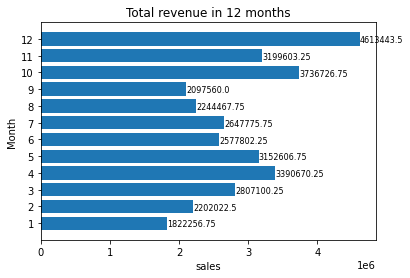

In [47]:
months = range (1,13)
plt.barh(months, sale_value)
plt.title("Total revenue in 12 months")
width = 0.8
ind = np.arange(len(sale_value))
for index, value in enumerate(sale_value):
    plt.text(value +2 , index + 0.8,
             str(value), size = 8 )
plt.yticks(months)
plt.ylabel ("Month")
plt.xlabel ("sales")
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

In [16]:
#Thanh pho nao co doanh thu cao nhat?

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [48]:
sample_address = "944 Walnut St, Boston, MA 02215"
sample_address.split(",")[1]
address_to_city = lambda address:address.split(",")[1]
df["City"] = df["Purchase Address"].apply(address_to_city)

In [49]:
sales_value_city = df.groupby("City").sum()["Sales"]
print(sales_value_city)
sales_value_city.max()

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32


8262204.0

In [50]:
cities = []
for city, sales in sales_value_city.items():
    cities.append(city)
print(cities)


[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


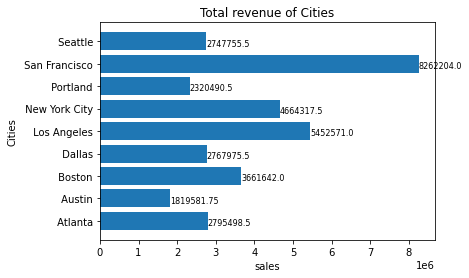

In [63]:
plt.barh( cities ,sales_value_city )
ind = np.arange(len(sales_value_city))
for index, value in enumerate(sales_value_city):
    plt.text(value +2 , index - 0.2,
             str(value), size = 8 )
plt.yticks(cities)
plt.title("Total revenue of Cities")
plt.ylabel ("Cities")
plt.xlabel ("sales")
plt.show()

In [28]:
### Can quang cao vao thoi gian nao de tang thoi gian mua hang
#1. Khung giờ nào có doanh thu cao nhất?

In [29]:

df["Order Date"] = pd.to_datetime(df["Order Date"])


In [24]:
df["Hours"] = df["Order Date"].dt.hour
sales_value_hour = df.groupby("Hours").sum()["Sales"]
print(sales_value_hour)
sales_value_hour.max()

Hours
0     7.137212e+05
1     4.608669e+05
2     2.348514e+05
3     1.457579e+05
4     1.626610e+05
5     2.306798e+05
6     4.481130e+05
7     7.448541e+05
8     1.192349e+06
9     1.639031e+06
10    1.944287e+06
11    2.300610e+06
12    2.316821e+06
13    2.155390e+06
14    2.083673e+06
15    1.941550e+06
16    1.904601e+06
17    2.129362e+06
18    2.219348e+06
19    2.412938e+06
20    2.281716e+06
21    2.042001e+06
22    1.607549e+06
23    1.179304e+06
Name: Sales, dtype: float32


2412938.5

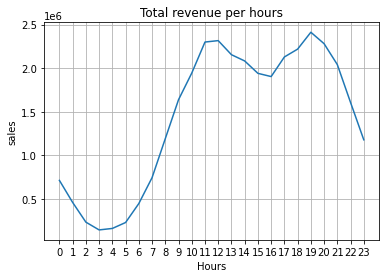

In [46]:
hours = [hour for hour, sales in sales_value_hour.items()] # SORT gía trị đúng vị trí
plt.plot(hours , sales_value_hour) 
plt.xticks(hours)
plt.title("Total revenue per hours")
plt.grid()
plt.xlabel ("Hours")
plt.ylabel ("sales")
plt.show()

In [26]:
#2 Khung giờ nào bán được nhiều sản phẩm nhất?

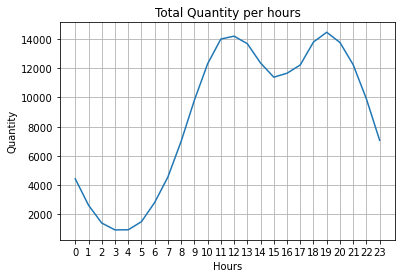

In [47]:
count_hour = df.groupby("Hours").sum()["Quantity Ordered"]
plt.plot(hours , count_hour)
plt.title("Total Quantity per hours")
plt.xticks(hours)
plt.grid()
plt.xlabel ("Hours")
plt.ylabel ("Quantity")
plt.show()

In [52]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [53]:
### Sản phẩm nào được mua cùng nhau

In [68]:
df_dup = df[df["Order ID"].duplicated(keep = False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
41,141275,USB-C Charging Cable,1,11.95,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin
42,141275,Wired Headphones,1,11.99,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin
57,141290,Apple Airpods Headphones,1,150.00,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles
58,141290,AA Batteries (4-pack),3,3.84,11.52,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles
133,141365,Vareebadd Phone,1,400.00,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,New York City
...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",09,Atlanta
11639,259314,Wired Headphones,1,11.99,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,Atlanta
11640,259314,AAA Batteries (4-pack),2,2.99,5.98,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,Atlanta
11677,259350,Google Phone,1,600.00,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",09,San Francisco


In [66]:
groupProduct = lambda product: ", ".join(product)

In [69]:
df_dup["All Products"] = df_dup.groupby('Order ID')["Product"].transform(groupProduct)
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,New York City,"Vareebadd Phone, Wired Headphones"


In [70]:
df_dup = df_dup[['Order ID',"All Products"]].drop_duplicates()
df_dup.head()

,Order ID,All Products
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"


In [95]:
df_dup["All Products"].value_counts().head(5).reset_index()


,index,All Products
0,"iPhone, Lightning Charging Cable",882
1,"Google Phone, USB-C Charging Cable",856
2,"iPhone, Wired Headphones",361
3,"Vareebadd Phone, USB-C Charging Cable",312
4,"Google Phone, Wired Headphones",303


In [84]:
all_products = df.groupby("Product").sum()["Quantity Ordered"]
all_products

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

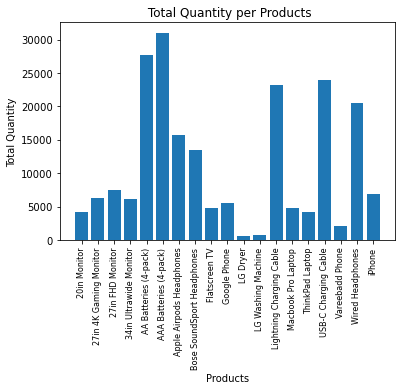

In [85]:
products_is = [product for product, quant in all_products.items()]
plt.bar(x= products_is , height = all_products)
plt.title(" Total Quantity per Products")
plt.xticks(products_is, rotation = 90, size = 8)
plt.xlabel ("Products")
plt.ylabel ("Total Quantity")
plt.show()

In [86]:
prices = df.groupby("Product").mean()["Price Each"]
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

In [87]:
total_prices = df.groupby("Product").sum()["Sales"]
total_prices

Product
20in Monitor                  4.541487e+05
27in 4K Gaming Monitor        2.435098e+06
27in FHD Monitor              1.132424e+06
34in Ultrawide Monitor        2.355558e+06
AA Batteries (4-pack)         1.061184e+05
AAA Batteries (4-pack)        9.274083e+04
Apple Airpods Headphones      2.349150e+06
Bose SoundSport Headphones    1.345565e+06
Flatscreen TV                 1.445700e+06
Google Phone                  3.319200e+06
LG Dryer                      3.876000e+05
LG Washing Machine            3.996000e+05
Lightning Charging Cable      3.470942e+05
Macbook Pro Laptop            8.037600e+06
ThinkPad Laptop               4.129959e+06
USB-C Charging Cable          2.865012e+05
Vareebadd Phone               8.272000e+05
Wired Headphones              2.464784e+05
iPhone                        4.794300e+06
Name: Sales, dtype: float32

C:\Users\Admin\AppData\Local\Temp/ipykernel_6828/1053424210.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_is, rotation = 90, size = 8)


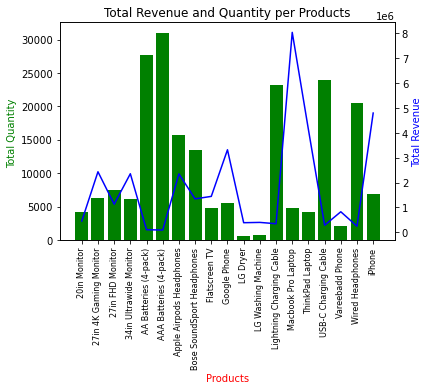

In [94]:
x = products_is
y1 = all_products
y2 = total_prices

fig, ax1 = plt.subplots()
plt.title("Total Revenue and Quantity per Products")
ax2 = ax1.twinx()
ax1.bar(x, y1, color = "g")
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_is, rotation = 90, size = 8)
ax1.set_xlabel('Products', color = "r")
ax1.set_ylabel('Total Quantity ', color='g')
ax2.set_ylabel('Total Revenue', color='b')

plt.show()

In [42]:
print(df_dup["All Products"].dtypes)

object


In [43]:
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,8.970000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles,20
11682,259354,iPhone,1,700.000000,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco,16
11683,259355,iPhone,1,700.000000,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.989990,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco,17


In [42]:
df_dup



,Order ID,All Products
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [53]:
df_products = df_dup["All Products"]

In [55]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [53]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [54]:
import pyodbc

In [31]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
11681,259353,AAA Batteries (4-pack),3,2.99000,8.97000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles
11682,259354,iPhone,1,700.00000,700.00000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco
11683,259355,iPhone,1,700.00000,700.00000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.98999,379.98999,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco
11685,259357,USB-C Charging Cable,1,11.95000,11.95000,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",09,San Francisco
